In [ ]:
!pip install Pillow

In [ ]:
!pip install textblob

In [ ]:
!pip install wordcloud

In [ ]:
!pip install sklearn

In [ ]:
!pip install bs4

In [ ]:
!pip install gensim

In [ ]:
!conda install -c conda-forge gensim

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import re
import math
import string

import requests
from bs4 import BeautifulSoup
import pickle

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Initializing the urls to be scraped
urls = ["https://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-caligula-2013-full-transcript/",
        "https://scrapsfromtheloft.com/2018/11/21/trevor-noah-son-of-patricia-transcript/",
        "https://scrapsfromtheloft.com/2020/05/10/russell-peters-deported-transcript/",
        "https://scrapsfromtheloft.com/2018/09/21/daniel-sloss-dark-transcript/",
        "https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/",
        "https://scrapsfromtheloft.com/2018/07/21/hannah-gadsby-nanette-transcript/",
        "https://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/",
        "https://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/",
        "https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/",
        "https://scrapsfromtheloft.com/2020/03/21/bert-kreischer-hey-big-boy-transcript/",
        "https://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/",
        "https://scrapsfromtheloft.com/2019/04/14/jimmy-carr-the-best-of-ultimate-gold-greatest-hits-transcript/"]

In [3]:
# Defining the scraper fucntion
def scraper(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, "html.parser")
    title = soup.find(class_ = "fusion-post-title-meta-wrap").find('h1').text
    name = title.split(":")[0].lower()
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    text = " ".join(text)
    return title, name, text

In [4]:
# Creating a dataframe of the scraped data
data = pd.DataFrame(columns = ["title", "name", "text"])
for url in urls:
    title, name, text = scraper(url)
    data = data.append({"title" : title, 
                        "name" : name, 
                        "text" : text}, ignore_index = True)
data

,title,name,text
0,ANTHONY JESELNIK: CALIGULA (2013) – Full Trans...,anthony jeselnik,Anthony Jeselnik. -MAN: Anthony. -WOMAN: Antho...
1,Trevor Noah: Son of Patricia (2018) – Full Tra...,trevor noah,A NETFLIX ORIGINAL COMEDY SPECIAL [distant tra...
2,RUSSELL PETERS: DEPORTED (2020) – FULL TRANSCRIPT,russell peters,[TYPING] [CHEERING] NARRATOR: Ladies and gentl...
3,Daniel Sloss: Dark (2018) – Full Transcript,daniel sloss,[music playing] [audience cheering] [music pla...
4,JIMMY O. YANG: GOOD DEAL (2020) – FULL TRANSCRIPT,jimmy o. yang,"ANNOUNCER: Ladies and gentlemen, welcome to th..."
5,HANNAH GADSBY: NANETTE (2018) – FULL TRANSCRIPT,hannah gadsby,[“Bobby Reid” plays]\n♪ There’s blood in the w...
6,BILL BURR: I’M SORRY YOU FEEL THAT WAY (2014) ...,bill burr,"[cheers and applause] All right, thank you! Th..."
7,HASAN MINHAJ: HOMECOMING KING (2017) – Full Tr...,hasan minhaj,[theme music: orchestral hip-hop] [crowd roars...
8,LEE MACK: GOING OUT LIVE (2010) – FULL TRANSCRIPT,lee mack,This programme contains strong language [APPLA...
9,BERT KREISCHER: HEY BIG BOY (2020) – FULL TRAN...,bert kreischer,[electronic music playing] [male announcer] La...


In [5]:
# Defining a function to clean the text (transcripts of comedians)
def cleaner(text):
    text = text.lower()
    text = re.sub("[*\xa0*]", " ", text)
    text = re.sub('\[.*?\]', '', text)
    text = [word for word in text.split() if not word in set(stopwords.words('english'))]
    text = " ".join(text)
    text = re.sub("[^a-zA-Z ]", "", text)
    return text

In [6]:
# Calling the cleaner function
data["clean_text"] = data["text"].apply(cleaner)

In [7]:
# Initializing a countvectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

stop_words = text.ENGLISH_STOP_WORDS

cv = CountVectorizer(stop_words = stop_words)
corpus = cv.fit_transform(data["clean_text"])
data_cv = pd.DataFrame(corpus.toarray(), columns = cv.get_feature_names())
data_cv.index = data["name"].values
data_cv 

,aaaaah,abandoned,abbey,abcs,abilities,able,aboard,abortion,absence,absofuckinglutely,...,zen,zero,zest,zillion,zipup,zodiac,zombie,zombies,zoning,zoo
anthony jeselnik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
trevor noah,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
russell peters,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
daniel sloss,0,0,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jimmy o. yang,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
hannah gadsby,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
bill burr,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,1,1,1,0
hasan minhaj,0,0,0,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
lee mack,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bert kreischer,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Transposing the dataframe
data_transpose = data_cv.transpose()
data_transpose

,anthony jeselnik,trevor noah,russell peters,daniel sloss,jimmy o. yang,hannah gadsby,bill burr,hasan minhaj,lee mack,bert kreischer,john mulaney,jimmy carr
aaaaah,0,0,0,0,0,0,1,0,0,0,0,0
abandoned,1,1,0,0,0,0,0,0,0,0,0,0
abbey,0,0,0,0,0,0,0,0,0,1,0,0
abcs,0,0,0,0,0,0,1,0,0,0,0,0
abilities,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zodiac,0,0,1,0,0,0,0,0,0,0,0,0
zombie,0,0,0,0,0,0,1,0,0,0,0,0
zombies,0,0,0,0,0,0,1,0,0,0,0,0
zoning,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
from collections import Counter

# Obtaining the top 30 words used by each comedian
top_words = {}
for comedian in data_transpose.columns:
    top = data_transpose[comedian].sort_values(ascending=False).head(30)
    top_words[comedian]= list(zip(top.index, top.values))

# Making the list of words
words = []
for comedian in data_transpose.columns:
    top = [word for (word, count) in top_words[comedian]]
    for t in top:
        words.append(t)
        
# Identifying the most common words used among all the comedians        
Counter(words).most_common()[0:30]

[('like', 12),
 ('know', 12),
 ('im', 12),
 ('got', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 11),
 ('youre', 11),
 ('people', 10),
 ('want', 9),
 ('think', 8),
 ('going', 8),
 ('said', 7),
 ('yeah', 7),
 ('time', 7),
 ('oh', 7),
 ('say', 6),
 ('ive', 6),
 ('dad', 6),
 ('fucking', 6),
 ('good', 6),
 ('thing', 5),
 ('didnt', 5),
 ('guys', 4),
 ('really', 4),
 ('hey', 4),
 ('man', 4),
 ('hes', 4),
 ('shit', 4),
 ('fuck', 4)]

In [10]:
from sklearn.feature_extraction import text 

# Adding additional stop words from the most common words if they appear in more than 5 routines
stopwords = [word for word, count in Counter(words).most_common() if count > 6]
stop_words = text.ENGLISH_STOP_WORDS.union(stopwords)

# Exploratory Data Analysis

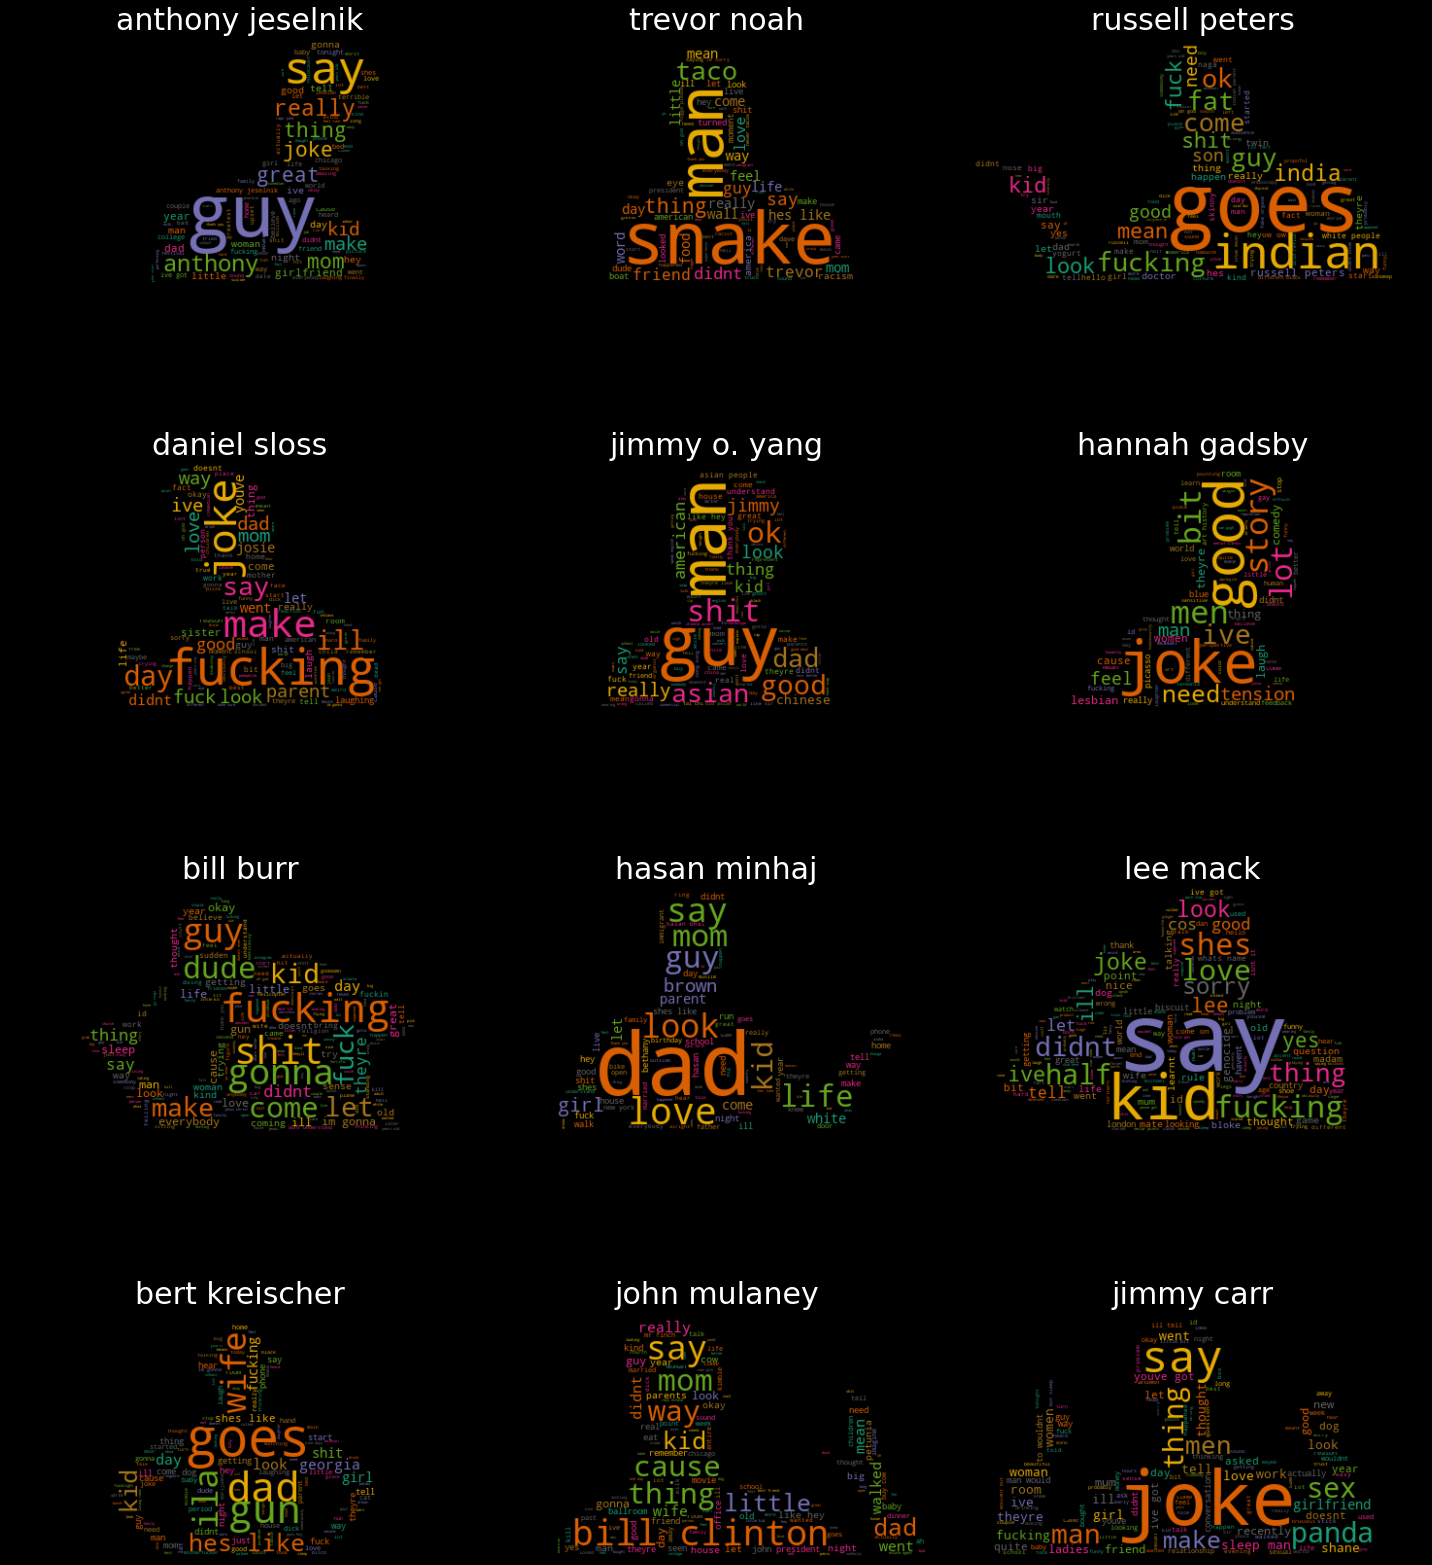

In [11]:
from PIL import Image
from wordcloud import WordCloud

# Initializing a list of masking images
images = ["anthony.png", "trevor.png", "russel.png", "daniel.png", "jimmy.png", "hannah.png", 
          "bill.png", "hasan.png", "leemack.png", "bert.png", "john.png", "jimm.png"]

# Setting up the size of the figure
fig = plt.figure(figsize = (20, 25))

# Generating a word cloud for each comedian
for i in range(len(data_transpose.columns)):
    mask = np.array(Image.open(images[i]))
    wc = WordCloud(stopwords=stop_words, background_color="black", 
                   colormap="Dark2", max_font_size=150, 
                   random_state=42, mask = mask)
    wc.generate(data["clean_text"][i])
    
    ax = fig.add_subplot(4, 3, i+1)
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    plt.title(data["name"][i], color = "white", fontsize = 30)

# Prettifying the plot
plt.tight_layout()
plt.show()

In [12]:
# Creating a dataframe of profane words used in acts
data_bad_words = data_transpose.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
anthony jeselnik,13,6
trevor noah,0,13
russell peters,63,26
daniel sloss,66,13
jimmy o. yang,25,37
hannah gadsby,21,8
bill burr,106,63
hasan minhaj,24,15
lee mack,32,4
bert kreischer,40,20


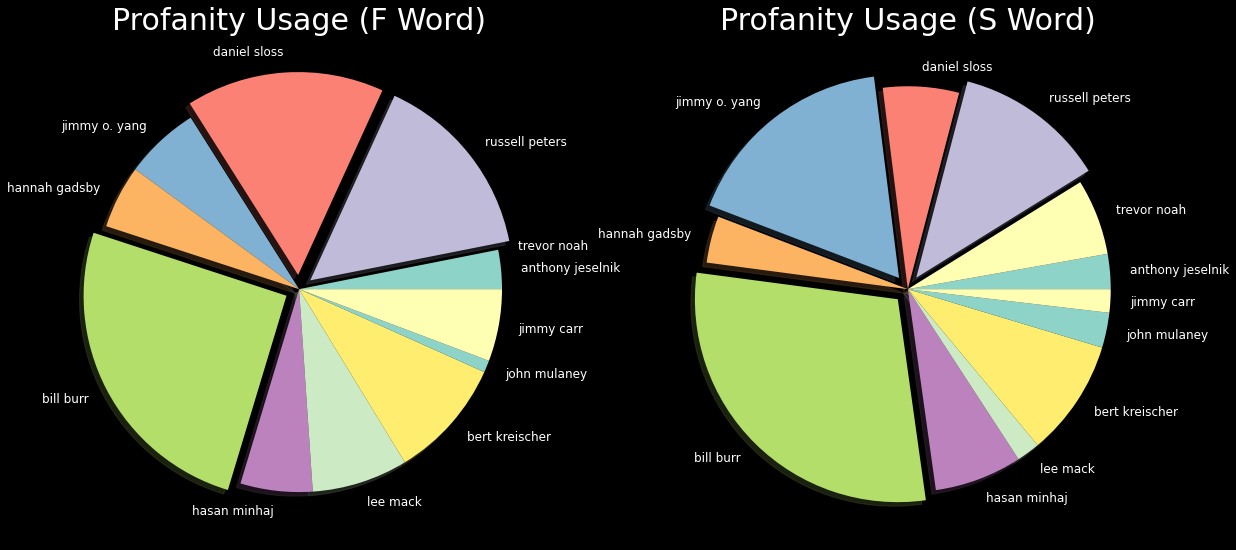

In [27]:
plt.figure(figsize = (20, 10))
plt.rcParams['font.size'] = 12.0

explode = (0, 0, 0.07, 0.07, 0, 0, 0.07, 0, 0, 0, 0, 0) 
plt.subplot(1, 2, 1)
plt.pie(data_profanity["f_word"], labels = data_profanity.index, explode = explode, shadow = True)
plt.title("Profanity Usage (F Word)", fontsize = 30)

explode = (0, 0, 0.07, 0, 0.07, 0, 0.07, 0, 0, 0, 0, 0)
plt.subplot(1, 2, 2)
plt.pie(data_profanity["s_word"], labels = data_profanity.index, explode = explode, shadow = True)
plt.title("Profanity Usage (S Word)", fontsize = 30)

plt.show()

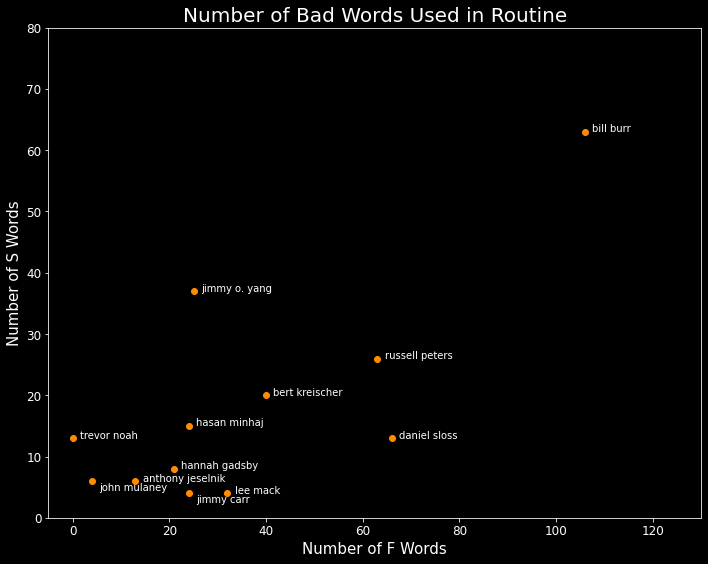

In [28]:
# Creating a scatter plot to visualize the profanity in each act
plt.figure(figsize = (10, 8))
for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='darkorange')
    plt.text(x+1.5, y, data["name"][i], fontsize=10)
    plt.ylim(0, 80)
    plt.xlim(-5, 130) 

# Prettifying the plot    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Words', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)
plt.tight_layout()

In [29]:
# Creating a list of words that occur at least once
word_list = [len(data_transpose[data_transpose[comedian] >= 1]) for comedian in data_transpose.columns]

# Creating a dataframe that contains the number of unique words used by each comediant
data_words = pd.DataFrame(list(zip(data_transpose.columns, word_list)), columns=['comedian', 'unique_words'])
data_words.sort_values(by='unique_words', inplace = True)
data_words

,comedian,unique_words
0,anthony jeselnik,858
2,russell peters,1181
4,jimmy o. yang,1217
1,trevor noah,1238
9,bert kreischer,1267
11,jimmy carr,1380
10,john mulaney,1391
5,hannah gadsby,1394
3,daniel sloss,1416
8,lee mack,1424


In [30]:
# Creating a list of total number of words used by a comedian
total_words = [sum(data_transpose[comedian]) for comedian in data_transpose.columns]

# Initializing the time interval of eact comedian's act
show_times = [59, 63, 67, 59, 57, 69, 80, 73, 60, 62, 62, 58]

# Adding new columns to the dataframe 
data_words['total_words'] = total_words
data_words['show_times'] = show_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['show_times']
data_words

,comedian,unique_words,total_words,show_times,words_per_minute
0,anthony jeselnik,858,2438,59,41.322034
2,russell peters,1181,4505,63,71.507937
4,jimmy o. yang,1217,4694,67,70.059701
1,trevor noah,1238,4101,59,69.508475
9,bert kreischer,1267,4017,57,70.473684
11,jimmy carr,1380,3756,69,54.434783
10,john mulaney,1391,5354,80,66.925000
5,hannah gadsby,1394,4705,73,64.452055
3,daniel sloss,1416,3956,60,65.933333
8,lee mack,1424,4126,62,66.548387


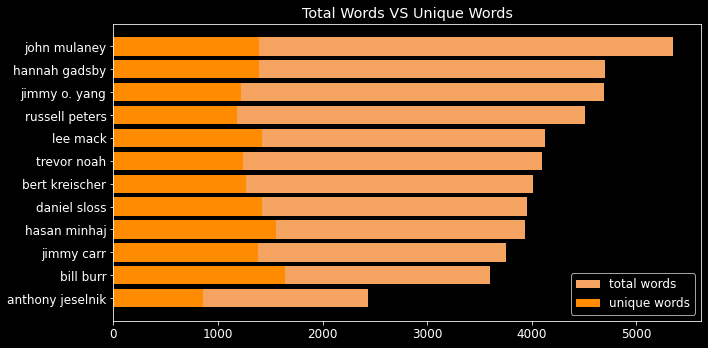

In [38]:
# Sorting the values for the plot
data_words.sort_values(by='total_words', inplace = True)

# Plotting total words v/s unique words for each comedian
plt.figure(figsize=(10,5))
plt.barh(data_words["comedian"], data_words["total_words"], label = "total words", color = "sandybrown")
plt.barh(data_words["comedian"], data_words["unique_words"], label = "unique words", color = "darkorange")
plt.title("Total Words VS Unique Words")
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()

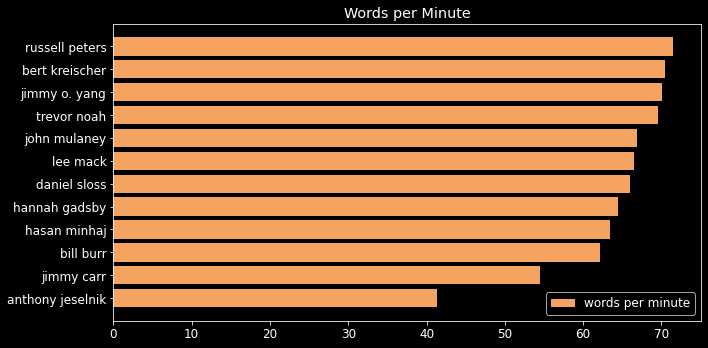

In [39]:
# Sorting the values for the plot
data_words.sort_values(by='words_per_minute', inplace = True)

# Plotting words per minute for each comedian
plt.figure(figsize=(10,5))
plt.barh(data_words["comedian"], data_words["words_per_minute"], label = "words per minute", color = "sandybrown")
plt.title("Words per Minute")
plt.legend()
plt.tight_layout()
plt.show()

# Sentiment Analysis

In [40]:
from textblob import TextBlob

# Defining labmda functions to determine the polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Applying the lambda functions
data['polarity'] = data['text'].apply(pol)
data['subjectivity'] = data['text'].apply(sub)
data

,title,name,text,clean_text,polarity,subjectivity
0,ANTHONY JESELNIK: CALIGULA (2013) – Full Trans...,anthony jeselnik,Anthony Jeselnik. -MAN: Anthony. -WOMAN: Antho...,anthony jeselnik man anthony woman anthony man...,0.091802,0.580988
1,Trevor Noah: Son of Patricia (2018) – Full Tra...,trevor noah,A NETFLIX ORIGINAL COMEDY SPECIAL [distant tra...,netflix original comedy special live nation pr...,0.096365,0.479900
2,RUSSELL PETERS: DEPORTED (2020) – FULL TRANSCRIPT,russell peters,[TYPING] [CHEERING] NARRATOR: Ladies and gentl...,narrator ladies gentlemen its start time dome ...,0.040105,0.520227
3,Daniel Sloss: Dark (2018) – Full Transcript,daniel sloss,[music playing] [audience cheering] [music pla...,thank you thank you its nice back states its y...,0.080482,0.562355
4,JIMMY O. YANG: GOOD DEAL (2020) – FULL TRANSCRIPT,jimmy o. yang,"ANNOUNCER: Ladies and gentlemen, welcome to th...",announcer ladies gentlemen welcome stage jimmy...,0.109584,0.451057
5,HANNAH GADSBY: NANETTE (2018) – FULL TRANSCRIPT,hannah gadsby,[“Bobby Reid” plays]\n♪ There’s blood in the w...,theres blood water wont cut down cause pe...,0.059695,0.517062
6,BILL BURR: I’M SORRY YOU FEEL THAT WAY (2014) ...,bill burr,"[cheers and applause] All right, thank you! Th...",right thank you thank much thank you thank you...,0.016479,0.537016
7,HASAN MINHAJ: HOMECOMING KING (2017) – Full Tr...,hasan minhaj,[theme music: orchestral hip-hop] [crowd roars...,whats up davis whats up im home bring back her...,0.086856,0.460619
8,LEE MACK: GOING OUT LIVE (2010) – FULL TRANSCRIPT,lee mack,This programme contains strong language [APPLA...,programme contains strong language dates acro...,0.069791,0.521878
9,BERT KREISCHER: HEY BIG BOY (2020) – FULL TRAN...,bert kreischer,[electronic music playing] [male announcer] La...,ladies gentlemen bert kreischer yeah whats up ...,-0.000885,0.497054


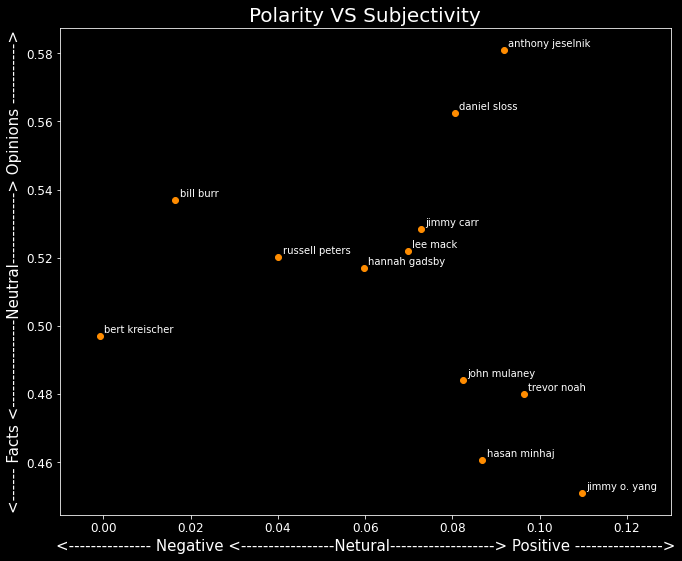

In [51]:
# Plotting polarity and subjectivity of each comedian
plt.figure(figsize=(10,8))
for i in range(len(data["name"])):
    x = data.polarity.loc[i]
    y = data.subjectivity.loc[i]
    plt.scatter(x, y, color='darkorange')
    plt.text(x+.001, y+.001, data['name'][i], fontsize=10)
    plt.xlim(-.01, .13) 

# Prettifying the plot
plt.title('Polarity VS Subjectivity', fontsize=20)
plt.xlabel('<--------------- Negative <-----------------Netural-------------------> Positive ---------------->', fontsize=15)
plt.ylabel('<------ Facts <----------------Neutral-------------> Opinions ----------->', fontsize=15)
plt.tight_layout()
plt.show()

In [42]:
# Defining a function to split the each comic act into ten parts
def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    size = math.floor(len(text) / n)
    start = np.arange(0, len(text), size)
    
    split_list = [text[start[piece]:start[piece]+size] for piece in range(n)]
    
    return split_list

In [43]:
# Calling the split_text function
list_pieces = [split_text(t) for t in data["text"]]

In [44]:
# Creating a list containing the polarity of each comedian in their acts
polarity_transcript = [[TextBlob(p).sentiment.polarity for p in lp ] for lp in list_pieces]

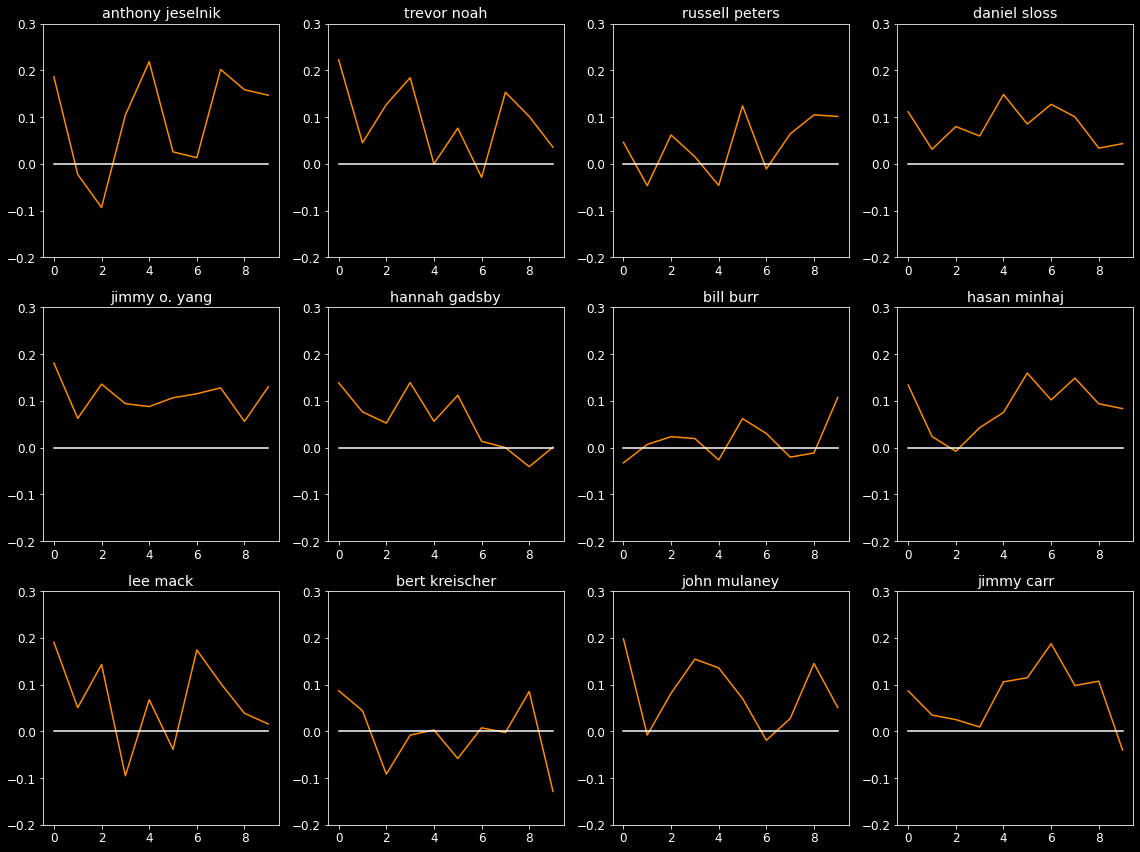

In [50]:
# Plotting the ploarity throught the act 
plt.rcParams['figure.figsize'] = [16, 12]
for index, comedian in enumerate(data["name"]):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index], color = "darkorange")
    plt.plot(np.arange(0,10), np.zeros(10), color = "white")
    plt.title(data['name'][index])
    plt.ylim(ymin=-.2, ymax=.3)

# Prettifying the plot
plt.tight_layout()
plt.show()

# Topic Modelling

In [104]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

# Creating a function to extract nouns and adjectives from text
def nouns_adj(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [105]:
# Applying the nouns and adjectives function to the transcripts to filter only on nouns
data_noun_adj = pd.DataFrame(data["clean_text"].apply(nouns_adj))
data_noun_adj.index = data["name"]

In [106]:
# Recreating a document-term matrix with only nouns and adjectvies
cv_nounadj = CountVectorizer(stop_words=stop_words)
data_cv_nounadj = cv_nounadj.fit_transform(data_nouns_adj.clean_text)
data_dtm_nounadj = pd.DataFrame(data_cv_nounadj.toarray(), columns=cv_nounadj.get_feature_names())
data_dtm_nounadj.index = data_noun_adj.index
# data_dtmna

In [107]:
from gensim import matutils, models
import scipy.sparse

# Create the gensim corpus
corpus_nounadj = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtm_nounadj.transpose()))

# Create the vocabulary dictionary
id2word = dict((v, k) for k, v in cv_nounadj.vocabulary_.items())

In [108]:
# Topic modeling using LDA
lda = models.LdaModel(corpus=corpus_nounadj, num_topics= 4, id2word=id2word, passes=5)
lda.print_topics()

[(0,
  '0.010*"good" + 0.006*"day" + 0.006*"years" + 0.005*"way" + 0.005*"old" + 0.005*"story" + 0.005*"dad" + 0.005*"guys" + 0.005*"life" + 0.005*"great"'),
 (1,
  '0.007*"day" + 0.006*"little" + 0.006*"shit" + 0.006*"way" + 0.005*"guy" + 0.005*"wife" + 0.005*"dad" + 0.005*"know" + 0.005*"old" + 0.004*"night"'),
 (2,
  '0.008*"indian" + 0.006*"way" + 0.006*"snake" + 0.005*"good" + 0.005*"food" + 0.005*"white" + 0.005*"tacos" + 0.005*"mom" + 0.005*"guy" + 0.005*"fat"'),
 (3,
  '0.011*"dad" + 0.007*"hasan" + 0.006*"life" + 0.005*"white" + 0.005*"mom" + 0.005*"parents" + 0.005*"school" + 0.004*"good" + 0.004*"home" + 0.004*"guys"')]

In [111]:
# Linking the topics to their respective documents
corpus_transformed = lda[corpus_nounadj]
list(zip([a for [(a,b)] in corpus_transformed], data_dtm_nounadj.index))

[(0, 'anthony jeselnik'),
 (2, 'trevor noah'),
 (2, 'russell peters'),
 (0, 'daniel sloss'),
 (0, 'jimmy o. yang'),
 (0, 'hannah gadsby'),
 (1, 'bill burr'),
 (3, 'hasan minhaj'),
 (0, 'lee mack'),
 (1, 'bert kreischer'),
 (1, 'john mulaney'),
 (1, 'jimmy carr')]